In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib as mp
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
train_data = pd.read_csv('C:\\Users\\anjali\\Documents\\Titanic\\train.csv') 
test_data = pd.read_csv('C:\\Users\\anjali\\Documents\\Titanic\\test.csv')

In [3]:
train_data.shape

(891, 12)

In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#There are missing values in Age only.
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [9]:
train_data['Died'] = 1 - train_data['Survived']


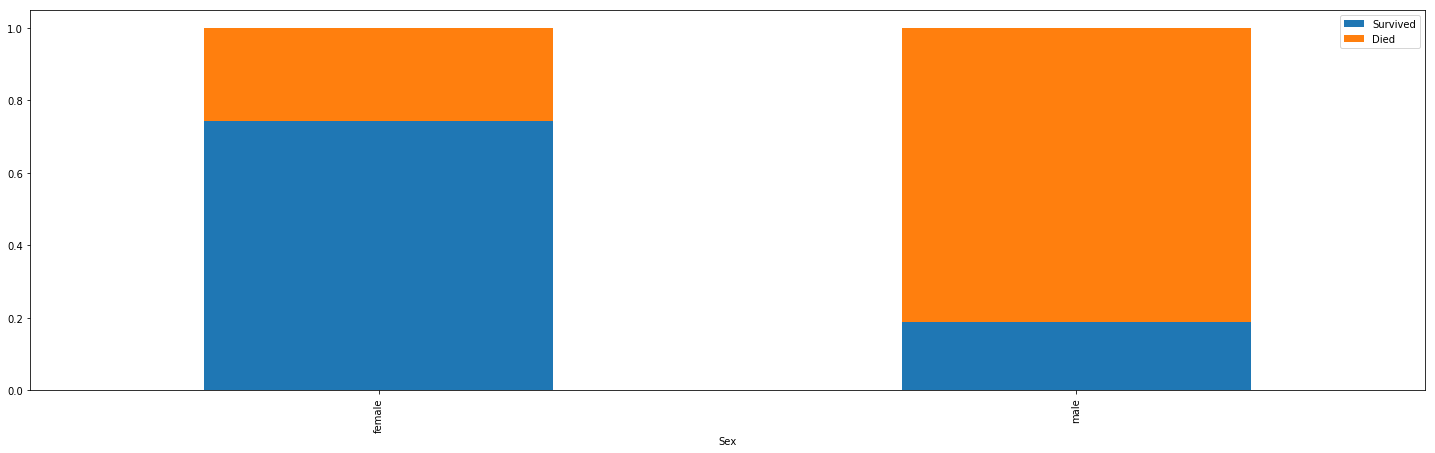

In [10]:
#exploring sex variable
train_data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), stacked=True)

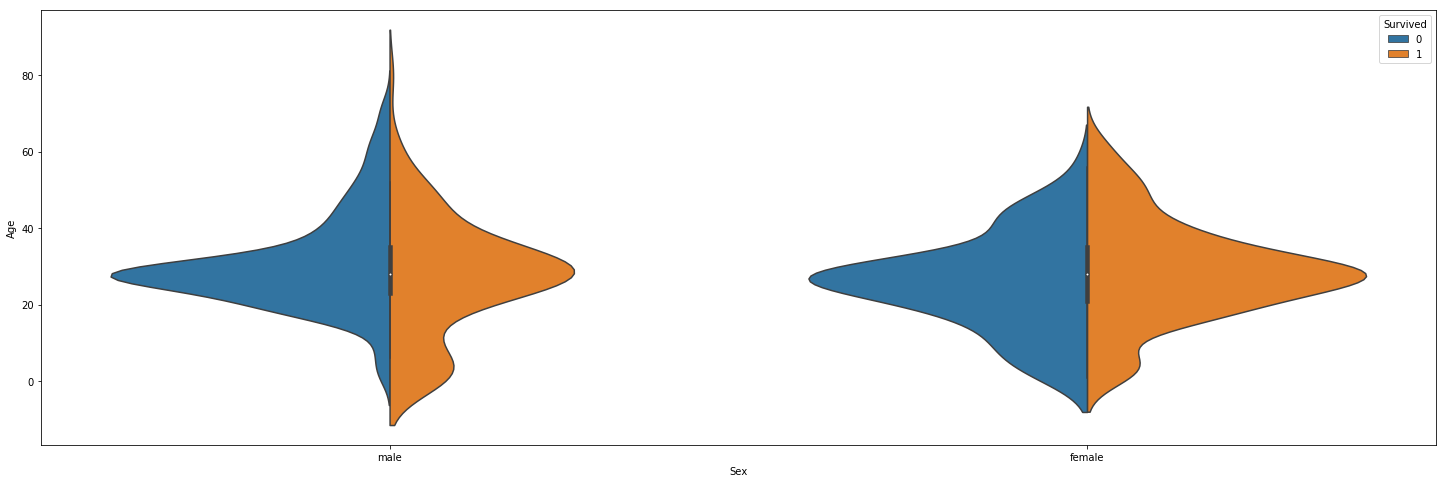

In [11]:
#Visualising age variable 
import seaborn as sb

fig = plt.figure(figsize=(25, 8))
sb.violinplot(x='Sex', y='Age', hue='Survived', data=train_data,  split=True)
#train_data.groupby('Age')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), stacked=True)



F:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


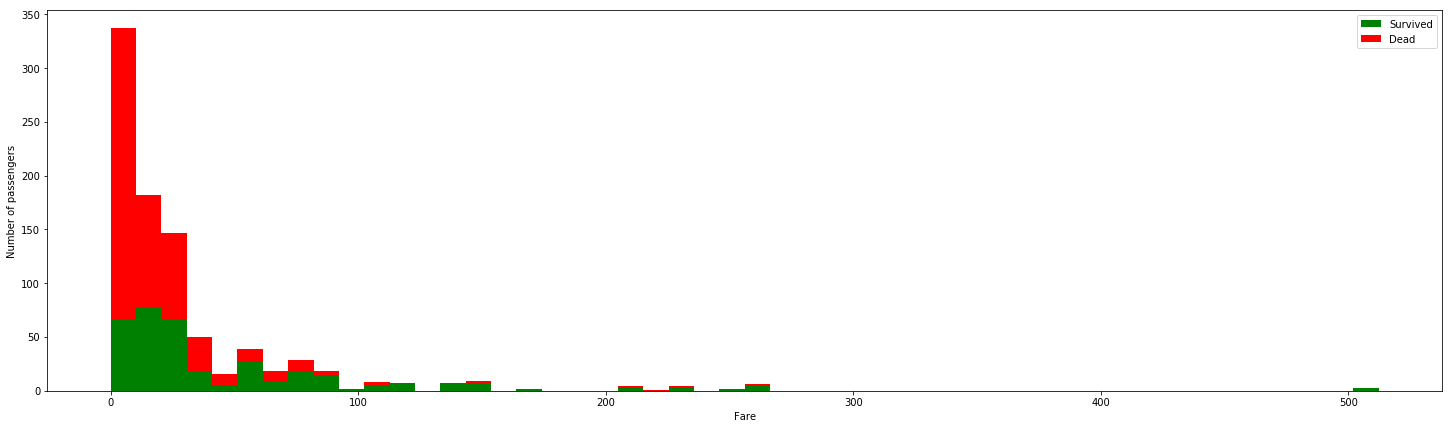

In [12]:
figure = plt.figure(figsize=(25, 7))
plt.hist([train_data[train_data['Survived'] == 1]['Fare'], train_data[train_data['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

In [13]:
#Passengers with cheaper ticket fares are more likely to die

In [14]:
train_data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Died'],
      dtype='object')

In [15]:
train_data=train_data.drop(columns=["Name","Cabin","Ticket","Died"])
test_data=test_data.drop(columns=["Name","Cabin","Ticket"])

In [16]:
train_data=pd.get_dummies(train_data, columns=["Sex","Embarked"], sparse=False, drop_first=False)
test_data=pd.get_dummies(test_data, columns=["Sex","Embarked"], sparse=False, drop_first=False)

In [17]:
train_data


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1
5,6,0,3,28.0,0,0,8.4583,0,1,0,1,0
6,7,0,1,54.0,0,0,51.8625,0,1,0,0,1
7,8,0,3,2.0,3,1,21.0750,0,1,0,0,1
8,9,1,3,27.0,0,2,11.1333,1,0,0,0,1
9,10,1,2,14.0,1,0,30.0708,1,0,1,0,0


In [18]:
Y=train_data.Survived
train_data=train_data.drop(columns="Survived")
X=train_data

In [25]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear", random_state=0)
classifier.fit(X,Y)
output=classifier.predict(test_data)
submission = pd.DataFrame({"PassengerId":test_data["PassengerId"],"Survived":output})
submission.to_csv("TitanicOutput.csv")